In [3]:
import cPickle
import time
from collections import defaultdict

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA


def load_movie_dict():
    start = time.time()
    with open(r"tmdb_info.pickle", "rb") as input_file:
        movie_dict = cPickle.load(input_file)
    elapsed = time.time() - start
    print "load: %.1f secs" % elapsed
    return movie_dict

    
movie_dict = load_movie_dict()

load: 4.7 secs


             budget    popularity       revenue  vote_average    vote_count
count  3.148600e+04  31486.000000  3.148600e+04  31486.000000  31486.000000
mean   1.147451e+06      0.099832  2.880663e+06      3.282392     22.185829
std    9.896281e+06      0.655988  3.420528e+07      3.146517    194.484481
min    0.000000e+00      0.000000  0.000000e+00      0.000000      0.000000
25%    0.000000e+00      0.000408  0.000000e+00      0.000000      0.000000
50%    0.000000e+00      0.002193  0.000000e+00      4.000000      1.000000
75%    0.000000e+00      0.034933  0.000000e+00      6.000000      3.000000
max    6.000000e+08     70.340712  1.845034e+09     10.000000   9904.000000
explained variance ratio:
[ 0.58440271  0.19610691]


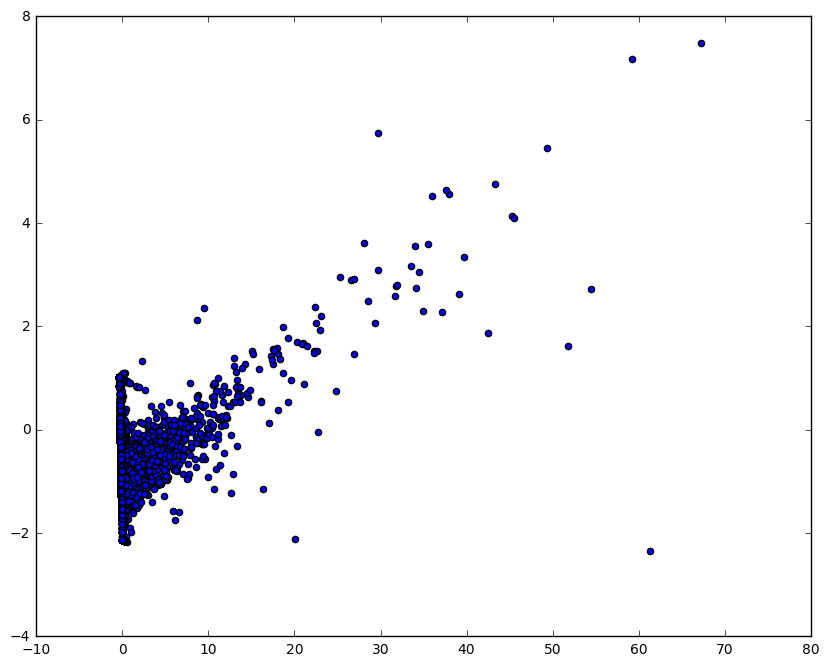

In [7]:
def get_movie_attribute_name_list(movie_dict):
    attr_set = set()
    for movie in movie_dict.itervalues():
        attr_set |= set(movie.__dict__.keys())
    return list(attr_set)


def get_movie_df(movie_dict):
    all_movie_attribute_name_list = [
        # 'poster_path', 'backdrop_path', 'base_uri', 'id', 'imdb_id',
        # 'genres',

        'production_countries', 'overview', 'video',
        'title', 'tagline', 'crew', 'homepage',
        'belongs_to_collection', 'original_language', 'status', 'spoken_languages',
        'adult', 'production_companies',
        'original_title', 'cast',

        'revenue', 'vote_count', 'release_date', 'popularity', 'budget', 'vote_average', 'runtime',
    ]
    movie_attribute_name_list = [
        'revenue',
        'vote_count',
        'popularity',
        'budget',
        'vote_average',
        # 'release_date',
        # 'runtime',
    ]

    movie_attribute_dict = defaultdict(list)
    for movie in movie_dict.itervalues():
        for movie_attribute_name in movie_attribute_name_list:
            attr_list = movie_attribute_dict[movie_attribute_name]
            attr_list.append(getattr(movie, movie_attribute_name))

    return pd.DataFrame(movie_attribute_dict)


def explore_pca(movie_df):
    print movie_df.describe()

    scaled_movies = preprocessing.scale(movie_df)

    pca = PCA(n_components=2)
    pca_X = pca.fit_transform(scaled_movies)
    
    print "explained variance ratio:"
    print pca.explained_variance_ratio_

    plt.figure(figsize=(10, 8))
    plt.scatter(pca_X[:, 0], pca_X[:, 1])
    plt.show()

    
movie_df = get_movie_df(movie_dict)
explore_pca(movie_df)    